In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Zad 12

In [2]:
df = pd.read_csv('Credit.csv')

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
len(df)

400

In [5]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
df = df.astype({'Gender': 'category', 'Student': 'category', 'Married': 'category', 'Ethnicity': 'category'})
df.dtypes

Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender       category
Student      category
Married      category
Ethnicity    category
Balance         int64
dtype: object

In [7]:
def dataframe_to_one_hot(df):
    return pd.get_dummies(df, columns=df.select_dtypes(include=["category"]).columns)

In [8]:
df = dataframe_to_one_hot(df)
df.dtypes

Income                        float64
Limit                           int64
Rating                          int64
Cards                           int64
Age                             int64
Education                       int64
Balance                         int64
Gender_Female                   uint8
Gender_Male                     uint8
Student_No                      uint8
Student_Yes                     uint8
Married_No                      uint8
Married_Yes                     uint8
Ethnicity_African American      uint8
Ethnicity_Asian                 uint8
Ethnicity_Caucasian             uint8
dtype: object

In [9]:
# Make copies of data for different subtasks
df_a = df.copy(deep=True)
df_b = df.copy(deep=True)

# a) if a person has income > 50

In [10]:
df_a['Income > 50'] = df_a.apply(lambda row: 1 if row['Income'] > 50 else 0, axis=1)
df_a

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Income > 50
0,14.891,3606,283,2,34,11,333,0,1,1,0,0,1,0,0,1,0
1,106.025,6645,483,3,82,15,903,1,0,0,1,0,1,0,1,0,1
2,104.593,7075,514,4,71,11,580,0,1,1,0,1,0,0,1,0,1
3,148.924,9504,681,3,36,11,964,1,0,1,0,1,0,0,1,0,1
4,55.882,4897,357,2,68,16,331,0,1,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,0,1,1,0,0,1,0,0,1,0
396,13.364,3838,296,5,65,17,480,0,1,1,0,1,0,1,0,0,0
397,57.872,4171,321,5,67,12,138,1,0,1,0,0,1,0,0,1,1
398,37.728,2525,192,1,44,13,0,0,1,1,0,0,1,0,0,1,0


In [11]:
def split_train_test(df, feature_vars, result_vars):
    X = df[feature_vars]
    y = df[result_vars]
    return train_test_split(X, y, test_size=0.2, random_state=13) # X_train, X_test, y_train, y_test

In [12]:
result_vars = ['Income > 50']
feature_vars = list(set(df_a.columns) - set(result_vars))

X_a, y_a = df_a[feature_vars], df_a[result_vars]

X_a_train, X_a_test, y_a_train, y_a_test = split_train_test(df_a, feature_vars, result_vars)

In [13]:
model = LogisticRegression(C=1e9, fit_intercept=False, solver='liblinear', penalty='l2', max_iter=10000)
mdl = model.fit(X_a_train, y_a_train.to_numpy().ravel())
test_accuracy = model.score(X_a_test, y_a_test.to_numpy().ravel())
print(test_accuracy)

0.9875


# b) credit cards

In [14]:
result_vars = ['Cards']
feature_vars = list(set(df_b.columns) - set(result_vars))

X_b, y_b = df_b[feature_vars], df_b[result_vars]

X_b_train, X_b_test, y_b_train, y_b_test = split_train_test(df_b, feature_vars, result_vars)

In [15]:
y_b['Cards'].value_counts()

2    115
3    111
4     72
1     51
5     34
6     11
7      4
9      1
8      1
Name: Cards, dtype: int64

In [16]:
model = LogisticRegression(C=1e9, fit_intercept=False, solver='liblinear', max_iter=10000, multi_class='auto', penalty='l1')
mdl = model.fit(X_b_train, y_b_train.to_numpy().ravel())

test_accuracy = model.score(X_b_test, y_b_test.to_numpy().ravel())
print(test_accuracy)

0.3625


# Exercise 13

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.neighbors import NeighborhoodComponentsAnalysis
#from sklearn.pipeline import Pipeline

In [18]:
# Make copies of data for different subtasks
df_a = df.copy(deep=True)
df_b = df.copy(deep=True)

## a)

In [19]:
df_a['Income > 50'] = df_a.apply(lambda row: 1 if row['Income'] > 50 else 0, axis=1)

In [20]:
df_a.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Income > 50
0,14.891,3606,283,2,34,11,333,0,1,1,0,0,1,0,0,1,0
1,106.025,6645,483,3,82,15,903,1,0,0,1,0,1,0,1,0,1
2,104.593,7075,514,4,71,11,580,0,1,1,0,1,0,0,1,0,1
3,148.924,9504,681,3,36,11,964,1,0,1,0,1,0,0,1,0,1
4,55.882,4897,357,2,68,16,331,0,1,1,0,0,1,0,0,1,1


In [21]:
# nca = NeighborhoodComponentsAnalysis(random_state=42)

In [22]:
result_vars = ['Income > 50']
feature_vars = list(set(df_a.columns) - set(result_vars))

X_a, y_a = df_a[feature_vars], df_a[result_vars]

X_a_train, X_a_test, y_a_train, y_a_test = split_train_test(df_a, feature_vars, result_vars)

### KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)

In [24]:
# nca_pipe = Pipeline([('nca', nca), ('knn', knn)])

In [25]:
# nca_pipe.fit(X_a_train, y_a_train.to_numpy().ravel())

In [26]:
# nca_pipe.score(X_a_test, y_a_test.to_numpy().ravel())

In [27]:
knn.fit(X_a_train, y_a_train.to_numpy().ravel())

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(X_a_test, y_a_test.to_numpy().ravel())

0.9375

In [29]:
knn.classes_

array([0, 1])

### DecisionTree

In [30]:
clf = DecisionTreeClassifier(max_depth=1)

In [31]:
clf.fit(X_a_train, y_a_train.to_numpy().ravel())

DecisionTreeClassifier(max_depth=1)

In [32]:
clf.score(X_a_test, y_a_test.to_numpy().ravel())

1.0

[Text(167.4, 163.07999999999998, 'X[3] <= 50.313\ngini = 0.425\nsamples = 320\nvalue = [222, 98]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 222\nvalue = [222, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 98\nvalue = [0, 98]')]

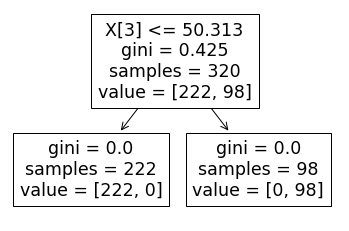

In [33]:
plot_tree(clf)

## b)

In [34]:
result_vars = ['Cards']
feature_vars = list(set(df_b.columns) - set(result_vars))

X_b, y_b = df_b[feature_vars], df_b[result_vars]

X_b_train, X_b_test, y_b_train, y_b_test = split_train_test(df_b, feature_vars, result_vars)

### KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=10)

In [36]:
knn.fit(X_b_train, y_b_train.to_numpy().ravel())

KNeighborsClassifier(n_neighbors=10)

In [37]:
knn.score(X_b_test, y_b_test.to_numpy().ravel())

0.225

In [38]:
knn.classes_

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

### DecisionTree

In [39]:
clf = DecisionTreeClassifier(max_depth=2)

In [40]:
clf.fit(X_b_train, y_b_train.to_numpy().ravel())

DecisionTreeClassifier(max_depth=2)

In [41]:
clf.score(X_b_test, y_b_test.to_numpy().ravel())

0.275

### KFold

In [42]:
from sklearn.model_selection import KFold, cross_val_score

In [43]:
seed = 13

In [44]:
models = []
models.append(('KNN1', KNeighborsClassifier(n_neighbors=1)))
models.append(('KNN2', KNeighborsClassifier(n_neighbors=2)))
models.append(('KNN5', KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN10', KNeighborsClassifier(n_neighbors=10)))
models.append(('DTCg', DecisionTreeClassifier(criterion='gini')))
models.append(('DTCe', DecisionTreeClassifier(criterion='entropy')))
models.append(('DTC1', DecisionTreeClassifier(max_depth=1)))
models.append(('DTC2', DecisionTreeClassifier(max_depth=2)))
models.append(('DTC3', DecisionTreeClassifier(max_depth=3)))
models.append(('DTC5', DecisionTreeClassifier(max_depth=5)))
models.append(('DTC10', DecisionTreeClassifier(max_depth=10)))

KNN1:	mean: 0.247500	std: 0.057500
KNN2:	mean: 0.265000	std: 0.040620
KNN5:	mean: 0.225000	std: 0.047434
KNN10:	mean: 0.252500	std: 0.050559
DTCg:	mean: 0.222500	std: 0.062700
DTCe:	mean: 0.232500	std: 0.047500
DTC1:	mean: 0.222500	std: 0.039449
DTC2:	mean: 0.277500	std: 0.070223
DTC3:	mean: 0.225000	std: 0.072457
DTC5:	mean: 0.287500	std: 0.084595
DTC10:	mean: 0.242500	std: 0.050062


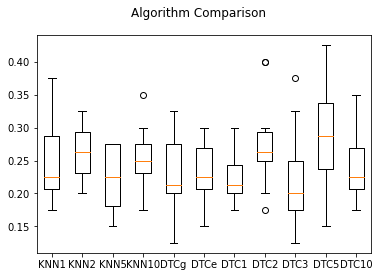

In [45]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_b, y_b.to_numpy().ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:\tmean: %f\tstd: %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Exercise 14

In [46]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns      # supports matplotlib in rendering good and beautiful charts.
sns.set()

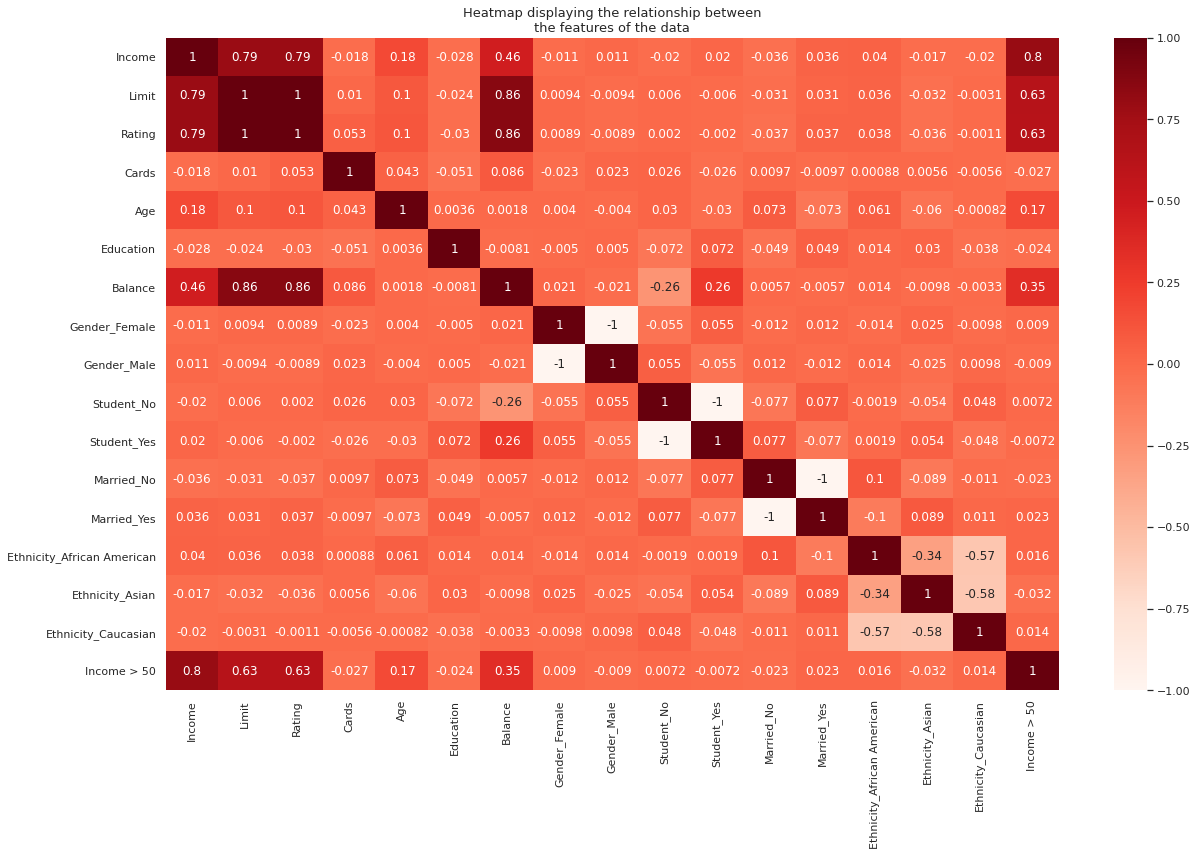

In [47]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and....
#.... the other features.
plt.figure(figsize=(20,12))
sns.heatmap(df_a.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [48]:
result_vars = ['Income > 50']
feature_vars = ['Income', 'Limit']

X_a_train, X_a_test, y_a_train, y_a_test = split_train_test(df_a, feature_vars, result_vars)

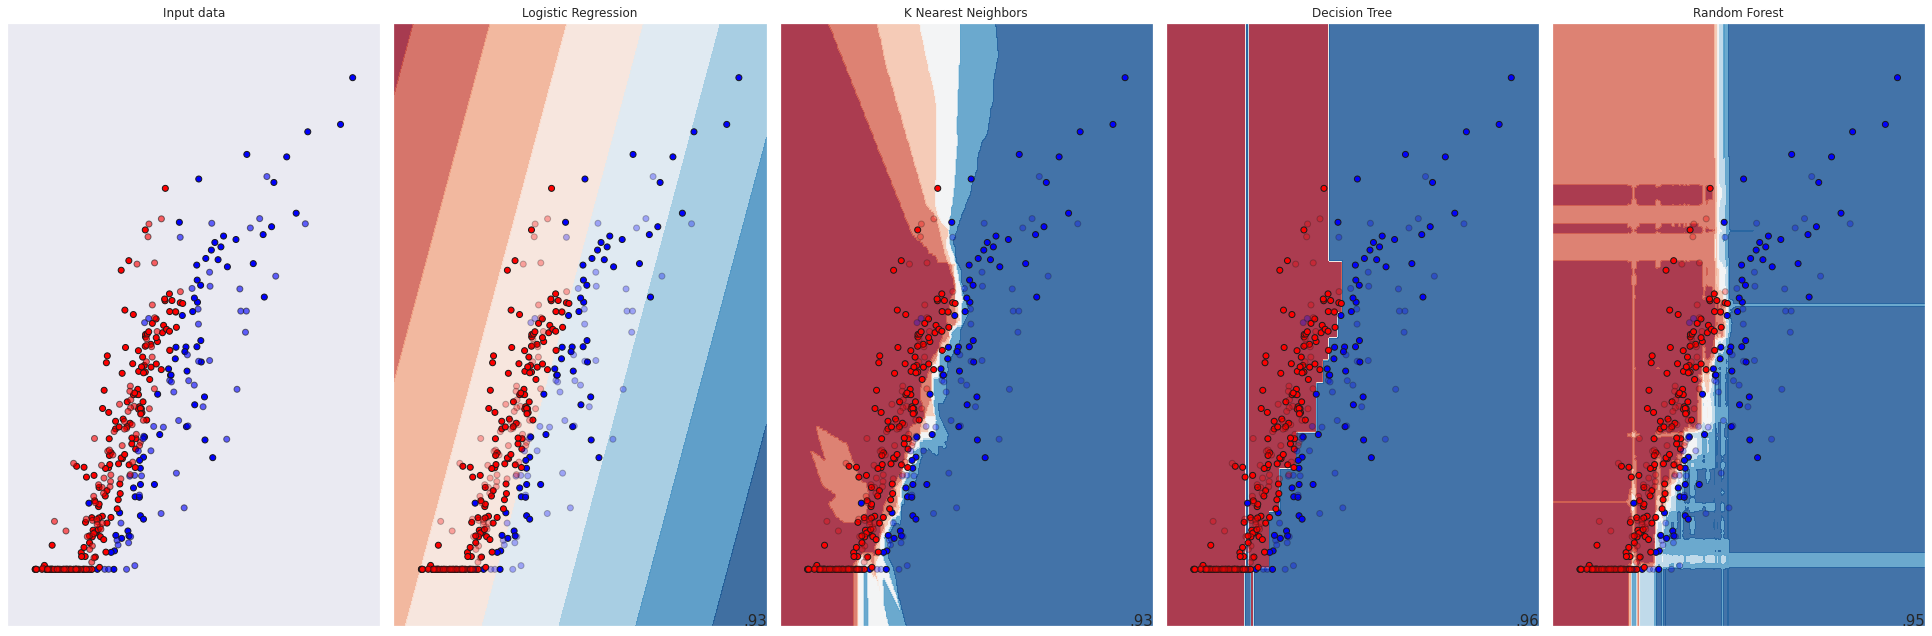

In [49]:
h = .02 
names = ["Logistic Regression", "K Nearest Neighbors", "Decision Tree", "Random Forest"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

df_plot = df_a.copy(deep=True)

features = [
    'Limit', 
    'Balance'
]
results = ['Income > 50']

X_plot = df_plot[features].to_numpy()
y_plot = df_plot[results].to_numpy().ravel()

dataset = (X_plot, y_plot)

figure = plt.figure(figsize=(27, 9))
i = 1

X, y = dataset
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, len(classifiers) + 1, i)

ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.3)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(name)
    ax.text(xx.max(), yy.min(), ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

# b)

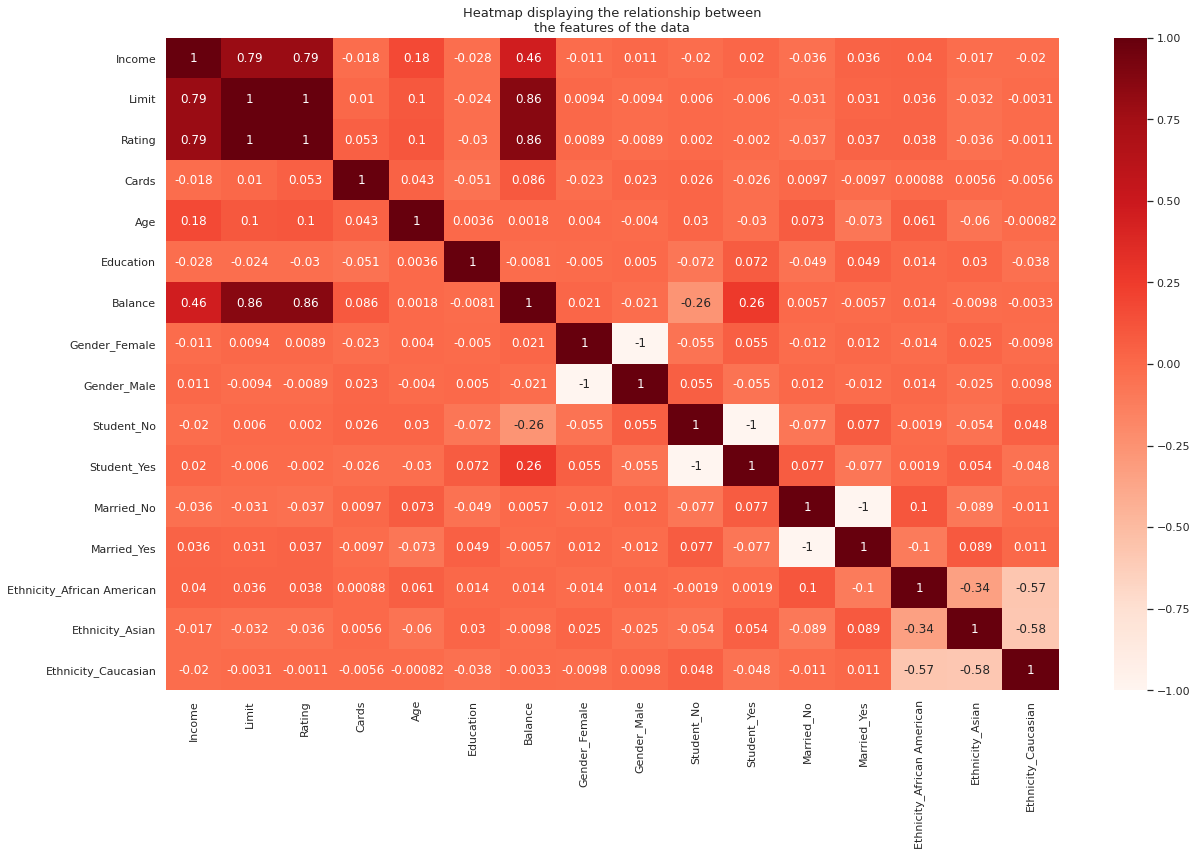

In [50]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and....
#.... the other features.
plt.figure(figsize=(20,12))
sns.heatmap(df_b.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()